In [1]:
from image_warping.image_morphing import *
from image_processing import *

import matplotlib.pyplot as plt

import cv2
import numpy as np
import pandas as pd


In [2]:
train_file = 'model_training/data/training.csv'
test_file = 'model_training/data/test.csv'
idlookup_file = 'model_training/data/IdLookupTable.csv'
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)
idlookup_data = pd.read_csv(idlookup_file)


Shape of clean_train_images: (2140, 96, 96, 1)
Shape of clean_train_keypoints: (2140, 30)
Shape of test_images: (1783, 96, 96, 1)


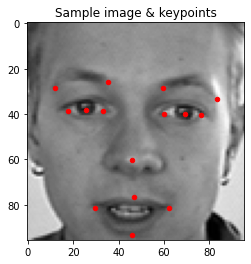

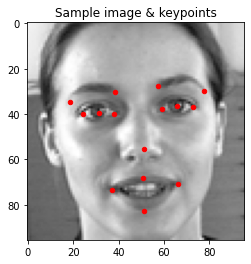

In [7]:
clean_train_data = train_data.dropna()
unclean_train_data = train_data.fillna(method = 'ffill')

def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], c='r', s=20)
    plt.title(title)

def load_images(image_data):
    images = []
    for idx, sample in image_data.iterrows():
        image = np.array(sample['Image'].split(' '), dtype=int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    images = np.array(images)/255.
    return images

def load_keypoints(keypoint_data):
    keypoint_data = keypoint_data.drop('Image',axis = 1)
    keypoint_features = []
    for idx, sample_keypoints in keypoint_data.iterrows():
        keypoint_features.append(sample_keypoints)
    keypoint_features = np.array(keypoint_features, dtype = 'float')
    return keypoint_features

clean_train_images = load_images(clean_train_data)
print("Shape of clean_train_images:", np.shape(clean_train_images))
clean_train_keypoints = load_keypoints(clean_train_data)
print("Shape of clean_train_keypoints:", np.shape(clean_train_keypoints))
test_images = load_images(test_data)
print("Shape of test_images:", np.shape(test_images))

train_images = clean_train_images
train_keypoints = clean_train_keypoints

fig, axis = plt.subplots()
plot_sample(clean_train_images[19], clean_train_keypoints[19], axis, "Sample image & keypoints")
plt.show()

fig, axis = plt.subplots()
plot_sample(clean_train_images[20], clean_train_keypoints[20], axis, "Sample image & keypoints")
plt.show()

'''
unclean_train_images = load_images(unclean_train_data)
print("Shape of unclean_train_images:", np.shape(unclean_train_images))
unclean_train_keypoints = load_keypoints(unclean_train_data)
print("Shape of unclean_train_keypoints:", np.shape(unclean_train_keypoints))
train_images = np.concatenate((train_images, unclean_train_images))
train_keypoints = np.concatenate((train_keypoints, unclean_train_keypoints))

'''

print()

In [23]:
time_steps = 5


image1 = 255 * clean_train_images[19]#.reshape(96, 96)
image2 = 255 * clean_train_images[20]#.reshape(96, 96)

image1 = image1.astype(dtype=np.uint8)
image2 = image2.astype(dtype=np.uint8)

image1 = image1.reshape(96, 96)
image2 = image2.reshape(96, 96)

print(image1.shape)


image1_features = clean_train_keypoints[19].reshape(-1 ,2)
image2_features = clean_train_keypoints[20].reshape(-1, 2)

image1_features = image1_features.astype(np.float32)
image2_features = image2_features.astype(np.float32)

image1_interpolants, image2_interpolants = create_linear_interpolations(image1_features, image2_features, time_steps)
warpers = create_warpers(image1_interpolants, image2_interpolants, time_steps)


(96, 96)


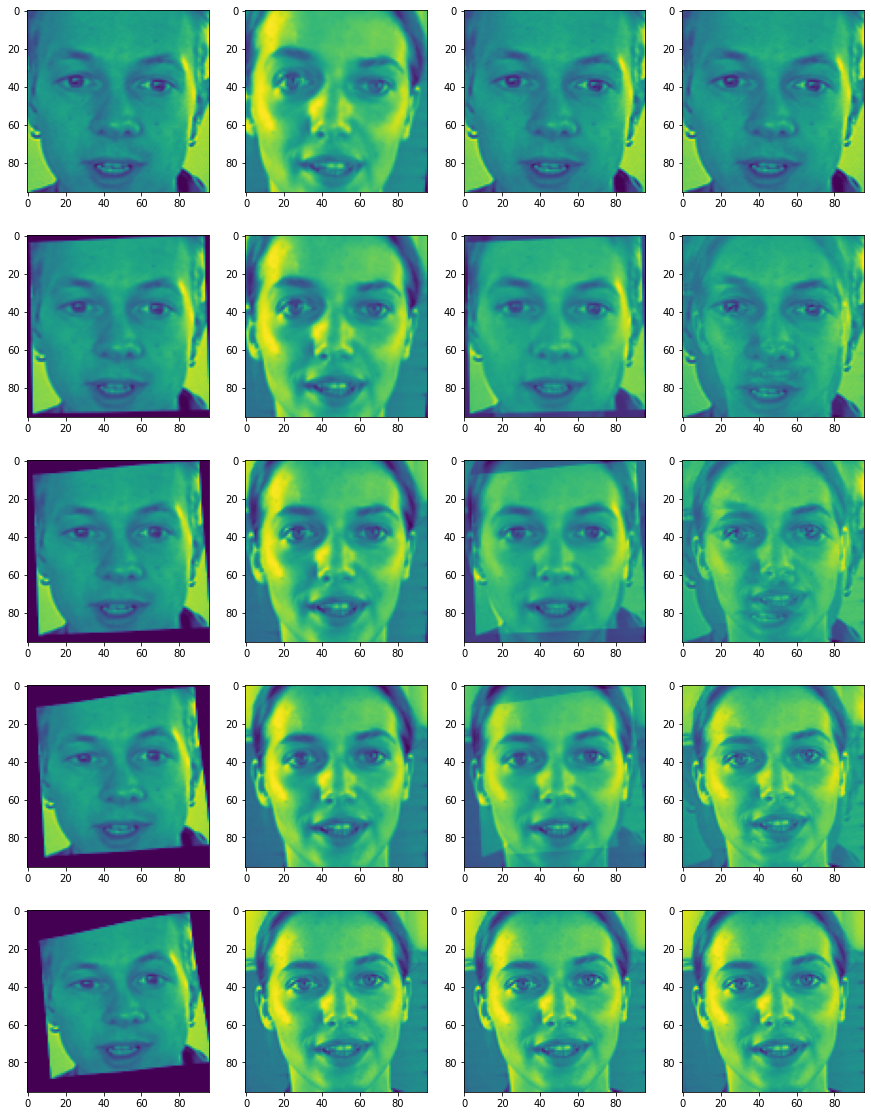

In [24]:
f, axarr = plt.subplots(time_steps, 4, figsize=(15, time_steps * 4))


for t in range(0, len(warpers)):
    
    (W1, _) = warpers[t]
    (_, W2) = warpers[time_steps - 1 - t]
    
    warped1 = W1.warpImage(image1)
    warped2 = W2.warpImage(image2)
    
    axarr[t, 0].imshow(warped1)    
    axarr[t, 1].imshow(warped2)

    image1_weight = (time_steps - 1 - t) / (time_steps - 1)
    image2_weight = t / (time_steps - 1)

    axarr[t, 2].imshow(image1_weight * warped1 + image2_weight * warped2)
    axarr[t, 3].imshow(image1_weight * image1 + image2_weight * image2)
    
plt.show()


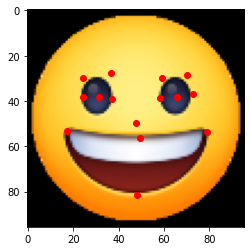

about to load model
loaded model


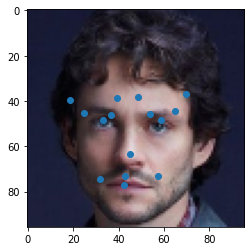

In [25]:
time_steps = 50

emoji, emoji_features = get_emoji('grinning-face', desired_size=(96, 96))

plt.imshow(emoji)
plt.scatter(emoji_features[:,0], emoji_features[:, 1], c='r')
plt.show()

face = cv2.imread('will_graham.jpg')
face, face_features = get_face(face, desired_size=(96, 96))

plt.imshow(face)
plt.scatter(face_features[:, 0], face_features[:, 1])
plt.show()


In [26]:


face_interpolants, emoji_interpolants = create_linear_interpolations(face_features, emoji_features, time_steps)
warpers = create_warpers(face_interpolants, emoji_interpolants, time_steps)


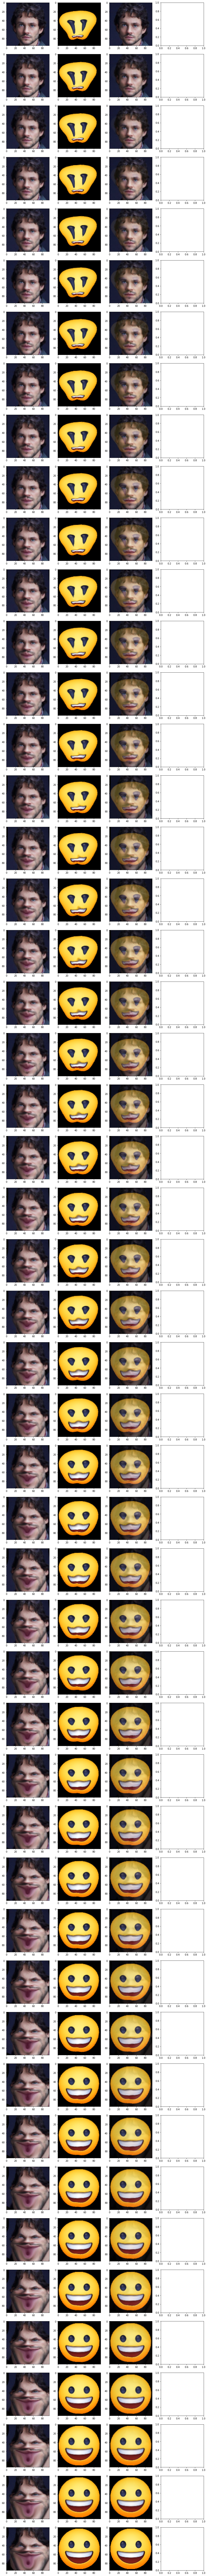

In [27]:

f, axarr = plt.subplots(time_steps, 4, figsize=(15, time_steps * 4))


for t in range(0, len(warpers)):
    
    (W1, _) = warpers[t]
    (_, W2) = warpers[time_steps - 1 - t]
    

    warped1 = W1.warpImage(face)
    warped2 = W2.warpImage(emoji)
    
    axarr[t, 0].imshow(warped1)    
    axarr[t, 1].imshow(warped2)

    image1_weight = (time_steps - 1 - t) / (time_steps - 1)
    image2_weight = t / (time_steps - 1)
    
    combined = image1_weight * warped1 + image2_weight * warped2
    axarr[t, 2].imshow(combined.astype('int'))
    #axarr[t, 3].imshow(image1_weight * warped2 + image2_weight * warped1)
    
plt.show()
